In [5]:
import plotnine as gg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns

In [6]:
plt.ion()
sns.set_style('white')#sets white backgrounds

In [7]:
#replacing default theme from gg to white background
def ggplot(data, mapping, *args, **kwargs):#* put all arguements into a list, **put all keyword args into datadict
    out = gg.ggplot(data, mapping, *args, **kwargs)
    out += gg.theme_bw()
    return out

In [8]:
def rt(f, sep='\t', index_col=0, header=0, *args, **kwargs):
    return pd.read_csv(f, sep=sep, index_col=index_col, header=header, *args, **kwargs)

In [11]:
logTpm = rt('gse75386_logtpm_filtered.tsv.gz')#python can read gz files without decompressing
trxAnnot = rt('Mus_musculus_GRCm38_82_TranscriptMap.tsv.gz')#rna SEQ transcripts
trxAnnot = trxAnnot.loc[logTpm.index]
annot = rt('gse75386_processed_annot.tsv')#annotations
print(annot.head())
print(logTpm.head())
print(trxAnnot.head())

              title  sample type                  age  \
run_accession                                           
SRR3082987     C100  single cell  post natal week 3-4   
SRR3082988     C101  single cell  post natal week 3-4   
SRR3082989     C102  single cell  post natal week 3-4   
SRR3082990     C103  single cell  post natal week 3-4   
SRR3082991     C104  single cell  post natal week 3-4   

                                   type  rep  
run_accession                                 
SRR3082987     CA1 cholecystokinin cell  NaN  
SRR3082988           CA1 pyramidal cell  NaN  
SRR3082989     CA1 cholecystokinin cell  NaN  
SRR3082990           CA1 pyramidal cell  NaN  
SRR3082991     CA1 cholecystokinin cell  NaN  
                    SRR3083070  SRR3082992  SRR3083004  SRR3083000  \
ENSMUST00000174625    4.529452    0.000000    0.000000    6.293347   
ENSMUST00000177715    0.000000    0.000000    0.000000    0.000000   
ENSMUST00000082421   13.173988   13.699030   12.611958   10.7

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
cellType = annot['type']
simpleType = pd.Series({
    'CA1 cholecystokinin cell' : "Cck",
    'CA1 parvalbumin cell' : "Pvalb",
    'CA1 pyramidal cell' : "Pyramidal"
})[cellType]
simpleType.index = cellType.index
simpleType.value_counts()

Pyramidal    25
Cck          19
Pvalb        14
dtype: int64

In [13]:
gse75386 = pd.DataFrame({
    'class' : simpleType[logTpm.columns],
    'Pvalb' : logTpm.loc['ENSMUST00000005860'],
    'Cck' : logTpm.loc['ENSMUST00000035120'],
    'Gad1' : logTpm.loc['ENSMUST00000140478']
}, index = logTpm.columns)
gse75386.head()

,class,Pvalb,Cck,Gad1
SRR3083070,Pvalb,10.799589,8.131528,9.471265
SRR3082992,Pyramidal,0.000000,0.000000,4.634024
SRR3083004,Pyramidal,0.000000,10.004501,0.000000
SRR3083000,Pyramidal,0.000000,8.718797,0.000000
SRR3083074,Cck,0.000000,11.237061,9.696922


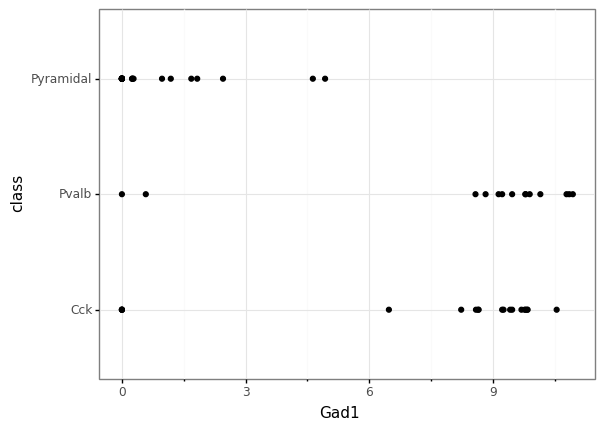

<ggplot: (-9223372029304124223)>


In [16]:
## -----------------------------------------------------------------
## GSE75386 stripchart example
## -----------------------------------------------------------------
ggstrip = ggplot(
    data = gse75386,
    mapping = gg.aes(
        x = 'Gad1',
        y = 'class'
    )
)
ggstrip += gg.geom_point()
print(ggstrip)

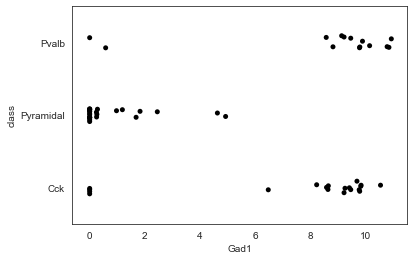

In [17]:
## can also use seaborn for strip plotting...
plt.close()
# plt.figure(figsize=(6, 1))
sns.stripplot(data=gse75386, y='class', x='Gad1', color='black')

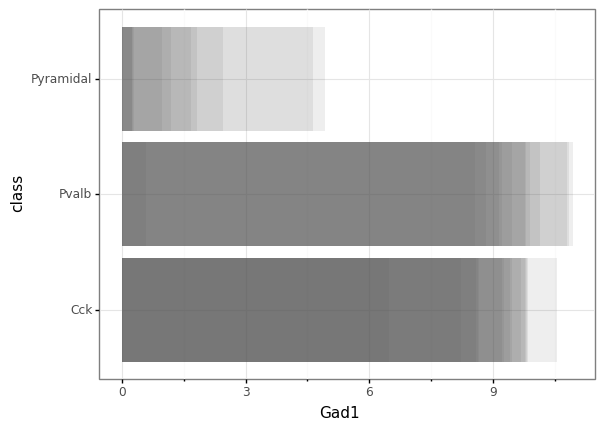

<ggplot: (7551640689)>


In [18]:
## -----------------------------------------------------------------
## GSE75386 overplotted bars
## -----------------------------------------------------------------
plt.close()
ggbar = ggplot(gse75386, gg.aes(x='class', y='Gad1'))
ggbar += gg.geom_bar(alpha=0.1, position='identity', stat='identity')
ggbar += gg.coord_flip()
print(ggbar)

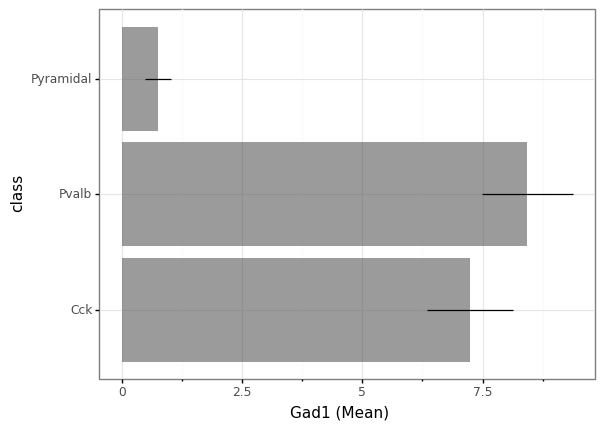

<ggplot: (-9223372029303043573)>


In [19]:
## -----------------------------------------------------------------
## GSE75386 mean bars + SE lines
## -----------------------------------------------------------------
plt.close()
## use pandas functionality to compute stat transformations
gse75386means = gse75386[['class', 'Gad1']]\
                .groupby('class').agg(np.mean).iloc[:, 0]
gse75386ses = gse75386[['class', 'Gad1']]\
              .groupby('class').agg(lambda x: x.std() / np.sqrt(len(x)))\
              .iloc[:, 0]
gse75386stats = pd.DataFrame({'Gad1 (Mean)' : gse75386means,
                              'SE' : gse75386ses,
                              'ymin' : gse75386means - gse75386ses,
                              'ymax' : gse75386means + gse75386ses,
                              'class' : gse75386means.index.values})
ggbarse = ggplot(gse75386stats, gg.aes(x='class', y='Gad1 (Mean)')) +\
          gg.geom_bar(alpha=0.6, stat='identity') +\ #have to give identity, default is histogram
          gg.geom_errorbar(mapping=gg.aes(ymin='ymin', ymax='ymax'), width=0.0001) +\ #width deletes the "feet" on SE
          gg.coord_flip() #flips so that data is displayed horizontally, better for y/categorical labels
print(ggbarse)

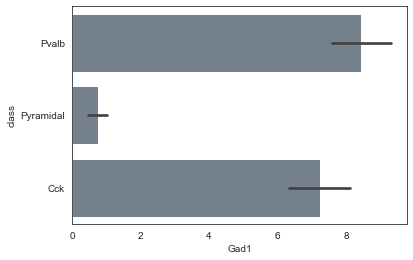

In [20]:
## mean bars +/- standard error using seaborn
plt.close()
# plt.figure(figsize=(6, 1))
sns.barplot(data=gse75386, y='class', x='Gad1', color='slategray', ci=68)

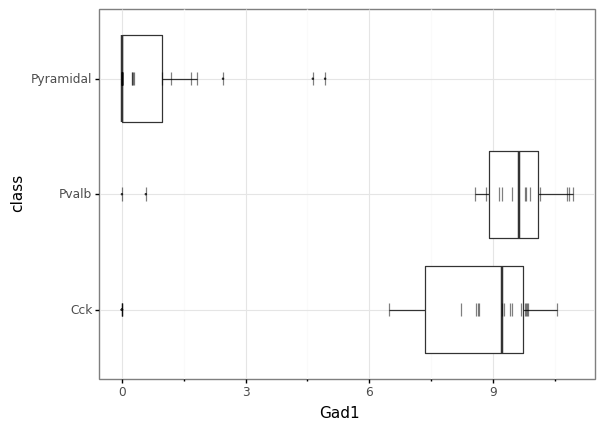

<ggplot: (7551633335)>


In [23]:
## -----------------------------------------------------------------
## GSE75386 boxplot + stripchart
## -----------------------------------------------------------------
#adds points, uses transparency to indicate more than one
plt.close()
ggbox = ggplot(gse75386, gg.aes(x='class', y='Gad1')) +\
        gg.geom_boxplot(stat='boxplot', outlier_size=0.0001) +\
        gg.geom_point(alpha=0.5, shape = '|', size = 5) +\
        gg.coord_flip()
print(ggbox)

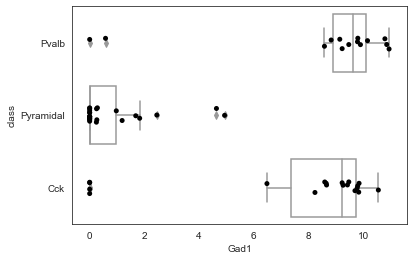

In [24]:
plt.close()
# plt.figure(figsize=(6, 1))
sns.boxplot(data=gse75386, y='class', x='Gad1', color='white')
sns.stripplot(data=gse75386, y='class', x='Gad1', color='black')

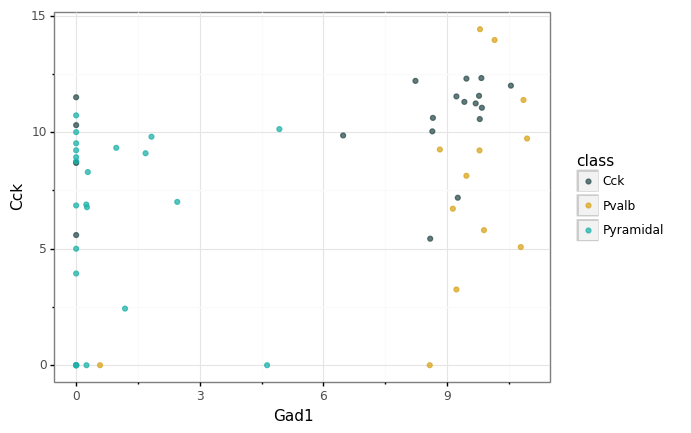

<ggplot: (-9223372029303135954)>


In [25]:
## -----------------------------------------------------------------
## GSE75386 scatterplot
## -----------------------------------------------------------------
plt.close()
ggscat = ggplot(
    gse75386,
    gg.aes(x='Gad1', y='Cck', color='class')
)
ggscat += gg.geom_point(alpha=0.75)
ggscat += gg.scale_color_manual(
values=['darkslategray', 'goldenrod', 'lightseagreen'])
print(ggscat)

In [59]:
def binarize(x, column, brk):
    out = pd.Series(['low ' + column]*x.shape[0], index=x.index)
    out.loc[x[column] > brk] = 'high ' + column
    return out

In [60]:
gse75386['Pvalb (cut)'] = binarize(gse75386, 'Pvalb', 5)
gse75386['Gad1 (cut)'] = binarize(gse75386, 'Gad1', 6)
gse75386.head()

,class,Pvalb,Cck,Gad1,Pvalb (cut),Gad1 (cut),odd
SRR3083070,Pvalb,10.799589,8.131528,9.471265,high Pvalb,high Gad1,
SRR3082992,Pyramidal,0.000000,0.000000,4.634024,low Pvalb,low Gad1,
SRR3083004,Pyramidal,0.000000,10.004501,0.000000,low Pvalb,low Gad1,
SRR3083000,Pyramidal,0.000000,8.718797,0.000000,low Pvalb,low Gad1,
SRR3083074,Cck,0.000000,11.237061,9.696922,low Pvalb,high Gad1,


//anaconda3/lib/python3.7/site-packages/plotnine/scales/scale_size.py:50: PlotnineWarning: Using alpha for a discrete variable is not advised.
  PlotnineWarning


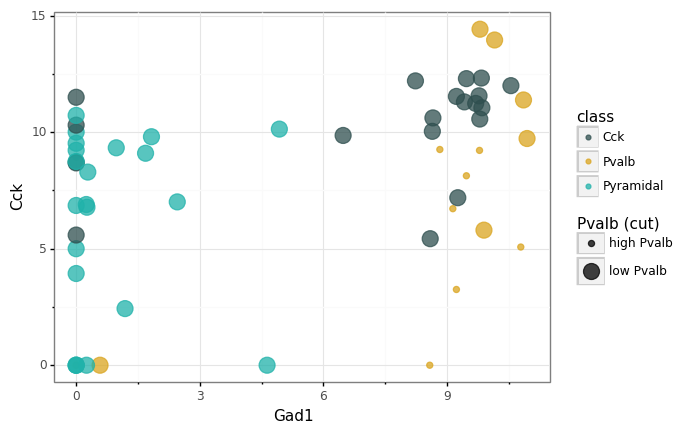

<ggplot: (-9223372029303178215)>


In [61]:
plt.close()
ggscat = ggplot(
    gse75386,
    gg.aes(x='Gad1', y='Cck', color='class', size='Pvalb (cut)')
)
ggscat += gg.geom_point(alpha=0.75)
ggscat += gg.scale_color_manual(
values=['darkslategray', 'goldenrod', 'lightseagreen'])
print(ggscat)

In [62]:
## -----------------------------------------------------------------
## GSE75386 scatterplot + text layer
## -----------------------------------------------------------------
gse75386['odd'] = annot.loc[logTpm.columns, 'title']
## Pyramidal cells with low Gad1 and low Pvalb are not odd
gse75386.loc[(gse75386['class'] == 'Pyramidal') &
             (gse75386['Gad1 (cut)'] == 'low Gad1') &
             (gse75386['Pvalb (cut)'] == 'low Pvalb'),
             'odd'] = ''
## Pvalb cells with high Gad1 and high Pvalb are not odd
gse75386.loc[(gse75386['class'] == 'Pvalb') &
             (gse75386['Gad1 (cut)'] == 'high Gad1') &
             (gse75386['Pvalb (cut)'] == 'high Pvalb'),
             'odd'] = ''
## Cck cells with high Gad1 and low Pvalb are not odd
gse75386.loc[(gse75386['class'] == 'Cck') &
             (gse75386['Gad1 (cut)'] == 'high Gad1') &
             (gse75386['Pvalb (cut)'] == 'low Pvalb'),
             'odd'] = ''

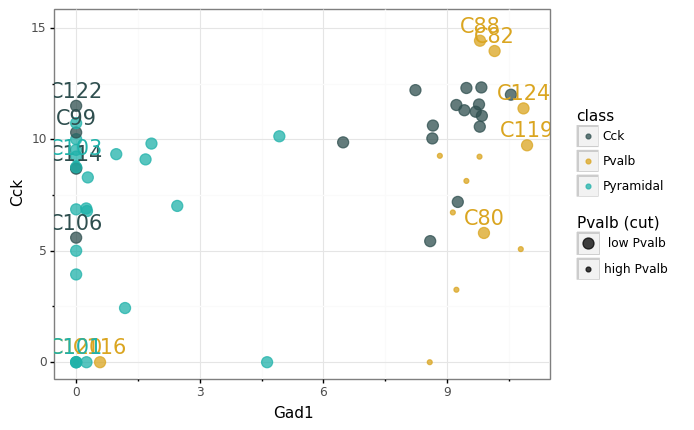

<ggplot: (-9223372029303167898)>


In [57]:
#to get text labels larger, shrink the size of the plot, also change from default aspect ratio of 1:1
plt.close()
ggscat = ggplot(
    gse75386,
    gg.aes(x='Gad1', y='Cck', color='class',
           size='Pvalb (cut)', label='odd')
)
ggscat += gg.scale_color_manual(values=['darkslategray', 'goldenrod', 'lightseagreen'])
ggscat += gg.geom_point(alpha=0.75)
ggscat += gg.geom_text(size=15, nudge_y= 0.65, show_legend=False)
ggscat += gg.scale_size_manual(values=[4., 1.5])
print(ggscat)

<Figure size 360x504 with 0 Axes>

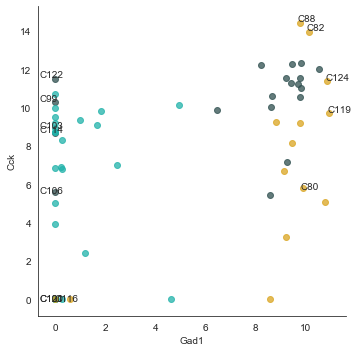

In [58]:
## alternately can generate similar scatterplot using seaborn
plt.close()
plt.figure(figsize=(5, 7))
p = sns.lmplot(data=gse75386.sort_index(), x='Gad1', y='Cck', hue='class',
               palette={'Cck' : 'darkslategray',
                        'Pvalb' : 'goldenrod',
                        'Pyramidal' : 'lightseagreen'},
               scatter_kws={'alpha': 0.75},
               legend=False, fit_reg=False)
## adding text to seaborn plot is a bit more painful than for ggplot...
for i in range(gse75386.shape[0]):
    p.fig.text(0.12 + 0.8*gse75386['Gad1'].iloc[i] / gse75386['Gad1'].max(),
               0.15 + 0.78*gse75386['Cck'].iloc[i] / gse75386['Cck'].max(),
               gse75386['odd'].iloc[i])

In [63]:
## -----------------------------------------------------------------
## minard plotting
## -----------------------------------------------------------------
troops = rt('minard-troops.tsv', index_col=None)
cities = rt('minard-cities.tsv', index_col=None)
troops.head()

,long,lat,survivors,direction,group
0,24.0,54.9,340000,A,1
1,24.5,55.0,340000,A,1
2,25.5,54.5,340000,A,1
3,26.0,54.7,320000,A,1
4,27.0,54.8,300000,A,1


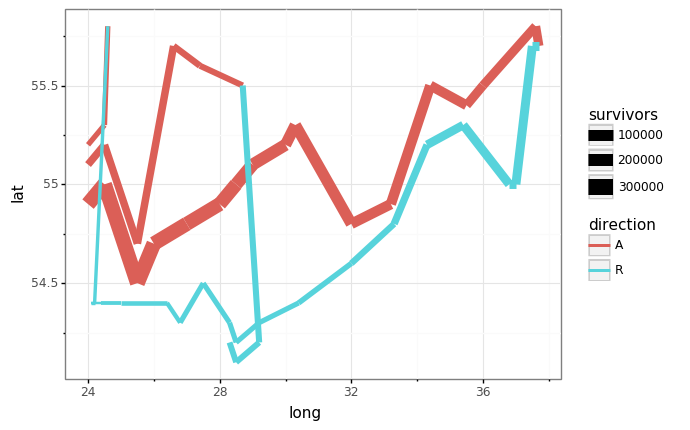

<ggplot: (-9223372029303089934)>


In [64]:
plt.close()
ggtroops = ggplot(troops, gg.aes('long', 'lat'))
ggtroops += gg.geom_path(gg.aes(
    size = 'survivors',
    color = 'direction',
    group = 'group'
))
print(ggtroops)

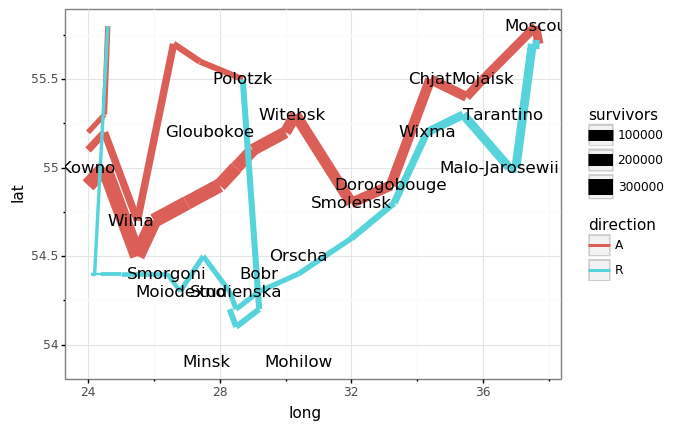

<ggplot: (-9223372029303058474)>


In [65]:
plt.close()
ggboth = ggtroops + gg.geom_text(
    gg.aes(label = 'city'),
    size = 12,
    data = cities
)
print(ggboth)

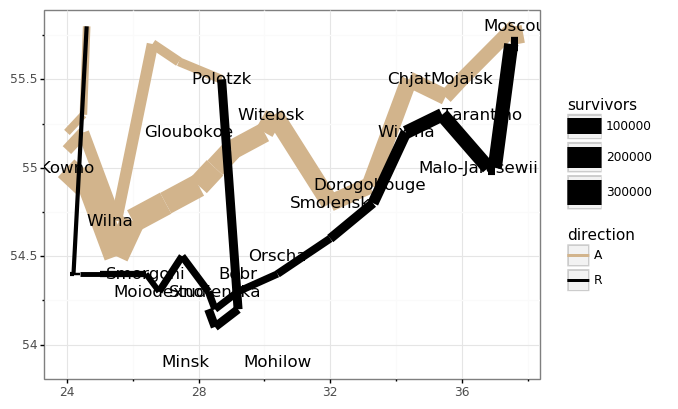

<ggplot: (7551646244)>


In [66]:
plt.close()
ggboth += gg.scale_size(
    range = [1, 10],
    breaks = [1e5, 2e5, 3e5]
)
ggboth = ggboth + gg.scale_color_manual(values = ["#d2b48c", "black"])
ggboth = ggboth + gg.xlab('') + gg.ylab('')
print(ggboth)

In [67]:
## -----------------------------------------------------------------
## Small multiples and facetting
## -----------------------------------------------------------------
anscombe = rt('anscombe_orig.tsv')
anscombe = pd.DataFrame({
    'x' : pd.Series(list(anscombe['x0'])*3 + list(anscombe['x4'])).values,
    'y' : pd.concat([anscombe['y1'], anscombe['y2'], anscombe['y3'], anscombe['y4']]).values,
    'set' : 'set' + pd.Series(['1'] * anscombe.shape[0] +
                              ['2'] * anscombe.shape[0] +
                              ['3'] * anscombe.shape[0] +
                              ['4'] * anscombe.shape[0]).values
})
anscombe.head()

,x,y,set
0,10,8.04,set1
1,8,6.95,set1
2,13,7.58,set1
3,9,8.81,set1
4,11,8.33,set1


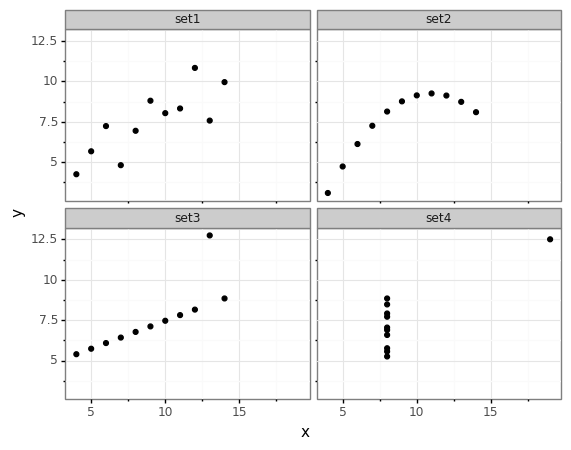

<ggplot: (7551753792)>


In [68]:
plt.close()
ggo = ggplot(anscombe, gg.aes(x='x', y='y')) +\
      gg.facet_wrap('~ set') +\
      gg.geom_point() +\
      gg.theme_bw()
print(ggo)

In [ ]:
plt.close()
ggo += gg.stat_smooth(method='lm')
print(ggo)

In [ ]:
## seaborn's lmplot function often useful in same situations
## one would want stat_smooth in R with ggplot2
plt.close()
sns.lmplot(data=anscombe, x='x', y='y', col='set')

In [ ]:
plt.close()
sns.lmplot(data=anscombe, x='x', y='y', col='set', robust=True, ci=None)

In [ ]:
plt.close()
sns.lmplot(data=anscombe, x='x', y='y', col='set', lowess=True)

In [ ]:
## -----------------------------------------------------------------
## GSE75386 scatterplot matrix (a.k.a. pairs plot)
##-----------------------------------------------------------------
plt.close()
## for pairs plot / scatterplot matrix can either use seaborn:
sns.pairplot(gse75386[['Gad1', 'Pvalb', 'Cck', 'class']],
             hue='class',
             palette={'Cck' : 'darkslategray',
                      'Pvalb' : 'goldenrod',
                      'Pyramidal' : 'lightseagreen'})

In [ ]:
plt.close()
## or pandas own scatter_matrix function:
scatter_matrix(gse75386[['Gad1', 'Pvalb', 'Cck', 'class']])
## neither one includes the categorical variable class, though

In [ ]:
## -----------------------------------------------------------------
## clustered heatmap
##-----------------------------------------------------------------
plt.close()
## seaborn's clustermap function is similar to R's pheatmap
theGenes = [
    'Npy',
    'Cacna1d',
    'Hcn1',
    'Erbb4',
    'Gad1',
    'Pvalb',
    'Slc17a8',
    'Kcna1',
    'Bcl11b',
    'Chrm1',
    'Calb1',
    'Gabra1',
    'Cck',
    'S100a10',
    'Vip'
]
theGeneData = logTpm.loc[trxAnnot.loc[logTpm.index, 'gene_name'].isin(theGenes)]
## remove duplicate transcripts for same gene...
theGeneData = theGeneData[~theGeneData.isin([
    'ENSMUST00000094934',
    'ENSMUST00000141336'
])]
## use gene_name instead of ensembl transcript id to identify genes
theGeneData.index = trxAnnot.loc[theGeneData.index, 'gene_name']
heatmapData = theGeneData.subtract(theGeneData.mean(axis=1), axis=0)
heatmapColors = simpleType.loc[heatmapData.columns].copy()
heatmapColors.loc[heatmapColors == 'Cck'] = 'darkslategray'
heatmapColors.loc[heatmapColors == 'Pvalb'] = 'goldenrod'
heatmapColors.loc[heatmapColors == 'Pyramidal'] = 'lightseagreen'
sns.clustermap(heatmapData, method='average', col_colors=heatmapColors)